In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
import platform
import os
import glob

pd.set_option('display.float_format',"{:.2f}".format)

# OS에 따라 다른 폰트 지정
if platform.system() == 'Darwin':   # macOS
    plt.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:  # Linux (예: Colab, Ubuntu)
    plt.rcParams['font.family'] = 'NanumGothic'

    
file_path = "2024.csv"
df = pd.read_csv(file_path,encoding='cp949', parse_dates=["계약일","취소일"])

C:\Users\user\AppData\Local\Temp\ipykernel_12932\3820869051.py:24: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path,encoding='cp949', parse_dates=["계약일","취소일"])


## 데이터의 유형

In [3]:
df.shape

(77523, 21)

In [4]:
df.head().T #T를 넣으면 세워짐

,0,1,2,3,4
접수연도,2024,2024,2024,2024,2024
자치구코드,11380,11500,11560,11560,11410
자치구명,은평구,강서구,영등포구,영등포구,서대문구
법정동코드,10200,10300,11100,12800,11200
법정동명,녹번동,화곡동,당산동1가,양평동4가,대현동
지번구분,1.00,1.00,1.00,1.00,1.00
지번구분명,대지,대지,대지,대지,대지
본번,86.00,924.00,143.00,220.00,90.00
부번,125.00,4.00,0.00,0.00,77.00
건물명,성원빌라(86-125),팔팔빌라,다솔시티하임,해울빌,유씨유 이대


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77523 entries, 0 to 77522
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   접수연도              77523 non-null  int64         
 1   자치구코드             77523 non-null  int64         
 2   자치구명              77522 non-null  object        
 3   법정동코드             77523 non-null  int64         
 4   법정동명              77523 non-null  object        
 5   지번구분              74965 non-null  float64       
 6   지번구분명             74965 non-null  object        
 7   본번                74964 non-null  object        
 8   부번                74964 non-null  object        
 9   건물명               74964 non-null  object        
 10  계약일               77523 non-null  datetime64[ns]
 11  물건금액(만원)          77523 non-null  int64         
 12  건물면적(㎡)           77523 non-null  float64       
 13  토지면적(㎡)           72446 non-null  float64       
 14  층                 7496

## 실습 1. 숫자형 컬럼을 데이터 유형별로 나누기

---

### 실습 조건
- **연도(year)에 해당하는 컬럼은 본 실습에서 제외한다**
- 연도 컬럼은 분석 목적에 따라 양적·질적으로 다르게 해석될 수 있으므로,
  본 실습에서는 데이터 유형 분류 대상에서 제외한다

---

### 1. 양적 데이터 (Quantitative Data)

숫자로 측정할 수 있으며, **크기·차이·연산**이 의미 있는 데이터

| 구분 | 설명 | 예시 |
|---|---|---|
| 연속형 (Continuous) | 측정 가능한 실수 값 | 키, 몸무게, 온도, 시간 |
| 이산형 (Discrete) | 측정 가능한 정수 값 | 구매 횟수, 방문자 수, 자녀 수 |

---

### 2. 질적 데이터 (Qualitative Data)

대상을 **특성·범주·종류**로 구분하는 데이터  
(숫자로 표현될 수 있으나, 산술 연산은 의미 없음)

| 구분 | 설명 | 예시 |
|---|---|---|
| 명목형 (Nominal) | 순서가 없는 범주 | 성별, 혈액형, 국가 |
| 순서형 (Ordinal) | 순서는 있으나 간격의 크기는 의미 없음 | 만족도, 선호도 순위, 등급 |

In [6]:
numeric_df = df.select_dtypes(include='number')
numeric_df.drop(columns=['접수연도','건축년도'],inplace=True)

In [7]:
numeric_df.columns = ['자치구코드', '법정동코드', '지번구분', '물건금액', '건물면적', '토지면적', '층']

In [8]:
numeric_df

,자치구코드,법정동코드,지번구분,물건금액,건물면적,토지면적,층
0,11380,10200,1.00,16400,53.07,25.00,4.00
1,11500,10300,1.00,35000,39.24,27.00,2.00
2,11560,11100,1.00,30000,29.54,14.00,5.00
3,11560,12800,1.00,36000,40.41,63.64,3.00
4,11410,11200,1.00,19300,17.31,30.87,5.00
...,...,...,...,...,...,...,...
77518,11530,10700,1.00,9190,53.61,124.00,1.00
77519,11530,10700,1.00,9190,53.61,124.00,1.00
77520,11530,10700,1.00,9740,53.61,124.00,2.00
77521,11440,11000,NaN,195000,157.45,116.70,NaN


명목형, 순서형, 연속형, 이산형 중 어디에 해당되는지 써보기 (연도 빼주세요!!!)
- 자치구코드:명목형
- 법정동코드:명목형
- 지번구분:명목형 
- 물건금액:연속형 
- 건물면적:연속형
- 토지면적:연속형
- 층: 이산형/명목형

## 기술통계

### 실습2. describe(), histogram 그리기

In [9]:
df.describe()

,접수연도,자치구코드,법정동코드,지번구분,계약일,물건금액(만원),건물면적(㎡),토지면적(㎡),층,취소일,건축년도
count,77523.00,77523.00,77523.00,74965.00,77523,77523.00,77523.00,72446.00,74965.00,3172,77256.00
mean,2024.00,11456.36,10948.61,1.00,2024-05-24 23:35:51.139661824,88598.66,68.03,18.65,7.89,2024-06-15 19:38:30.718789120,1986.78
min,2024.00,11110.00,10100.00,1.00,2021-02-08 00:00:00,2600.00,8.48,0.00,-2.00,2024-01-02 00:00:00,0.00
25%,2024.00,11305.00,10200.00,1.00,2024-03-27 00:00:00,32000.00,41.85,0.00,3.00,2024-04-23 00:00:00,1996.00
50%,2024.00,11470.00,10600.00,1.00,2024-06-05 00:00:00,66000.00,59.92,0.00,6.00,2024-06-24 00:00:00,2004.00
75%,2024.00,11620.00,11000.00,1.00,2024-07-24 00:00:00,115000.00,84.87,27.00,11.00,2024-08-17 00:00:00,2016.00
max,2024.00,26230.00,18700.00,3.00,2024-10-14 00:00:00,2850000.00,2932.27,30822.00,68.00,2024-10-14 00:00:00,2024.00
std,0.00,186.07,1228.36,0.09,NaN,87195.98,53.12,122.38,6.32,NaN,190.38


In [10]:
continuous_cols =['물건금액','토지면적','건물면적']
conti_df = numeric_df[continuous_cols].copy()

In [11]:
conti_df.describe()

,물건금액,토지면적,건물면적
count,77523.00,72446.00,77523.00
mean,88598.66,18.65,68.03
std,87195.98,122.38,53.12
min,2600.00,0.00,8.48
25%,32000.00,0.00,41.85
50%,66000.00,0.00,59.92
75%,115000.00,27.00,84.87
max,2850000.00,30822.00,2932.27


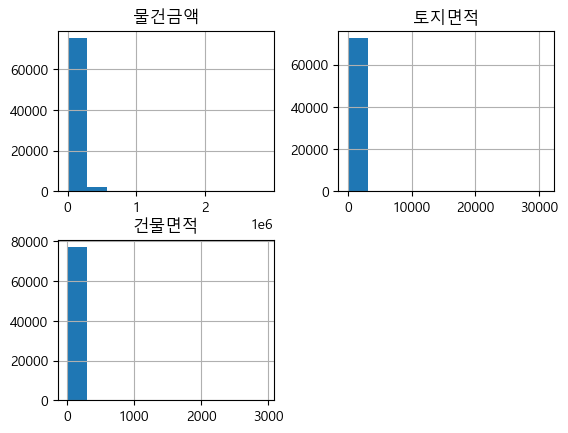

In [12]:
conti_df.hist()
plt.show()

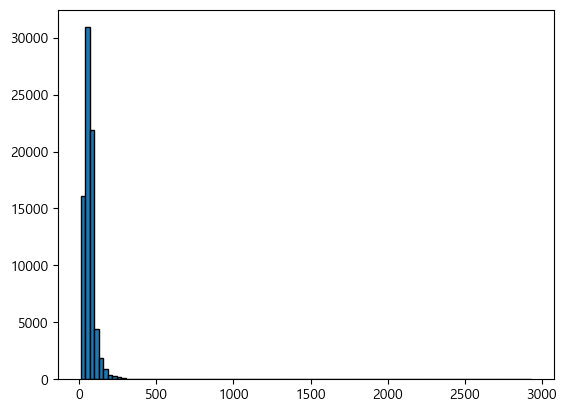

In [13]:
plt.hist(conti_df['건물면적'],bins=100, edgecolor='black')
plt.show()

### 실습3. IQR 방식의 이상치 제거

In [14]:
conti_df.describe()

,물건금액,토지면적,건물면적
count,77523.00,72446.00,77523.00
mean,88598.66,18.65,68.03
std,87195.98,122.38,53.12
min,2600.00,0.00,8.48
25%,32000.00,0.00,41.85
50%,66000.00,0.00,59.92
75%,115000.00,27.00,84.87
max,2850000.00,30822.00,2932.27


In [15]:
# IQR 방식의 이상치 제거
area_data = conti_df['토지면적'].dropna().values
q_1 = np.percentile(area_data, q=25)
q_3 = np.percentile(area_data, q=75)
iqr = q_3 - q_1
q_1,q_3,iqr

(np.float64(0.0), np.float64(27.0), np.float64(27.0))

In [16]:
lower_whisker = q_1 - iqr*1.5
upper_whisker = q_3 + iqr*1.5
conti_df.loc[(conti_df['토지면적']<lower_whisker)|(conti_df['토지면적']>upper_whisker)]

,물건금액,토지면적,건물면적
5,744000,534.00,1502.31
12,69000,90.00,136.16
64,30000,157.00,194.85
148,185000,154.00,230.41
154,30800,91.00,61.87
...,...,...,...
77518,9190,124.00,53.61
77519,9190,124.00,53.61
77520,9740,124.00,53.61
77521,195000,116.70,157.45


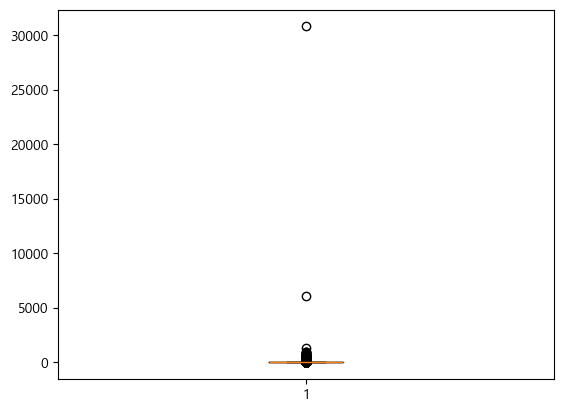

In [17]:
plt.boxplot(area_data)
plt.show()

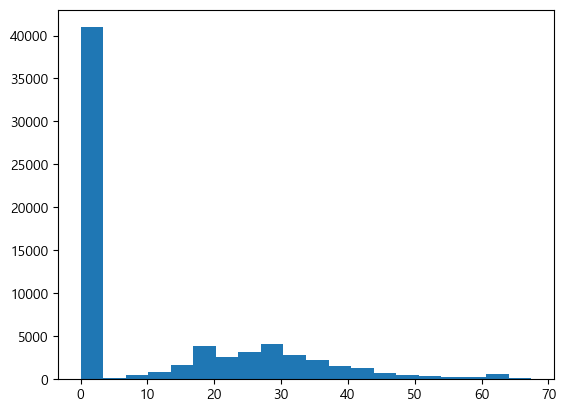

In [18]:
outliers = conti_df.loc[(conti_df['토지면적']<lower_whisker)|(conti_df['토지면적']>upper_whisker)]
area_data_cleaned = conti_df.loc[(conti_df['토지면적']>=lower_whisker)&(conti_df['토지면적']<=upper_whisker),'토지면적']
plt.hist(area_data_cleaned,bins=20)
plt.show()

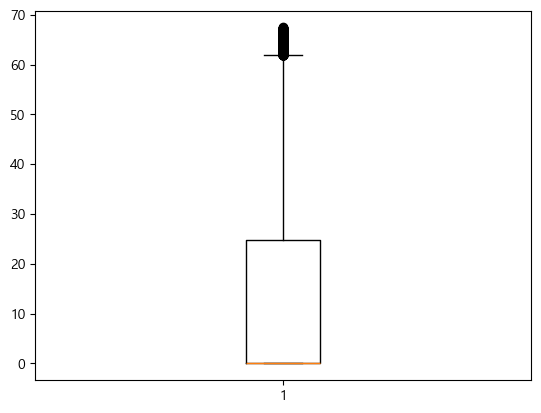

In [19]:
plt.boxplot(area_data_cleaned)
plt.show()

## 추론 통계

In [20]:
# 샘플 만들기 
sample_df = conti_df.sample(200,random_state=42)

### 실습4. 샘플데이터와 전체데이터 비교하기

In [21]:
sample_df.describe()

,물건금액,토지면적,건물면적
count,200.00,188.00,200.00
mean,88368.32,21.16,70.83
std,76123.73,36.15,56.22
min,8000.00,0.00,13.58
25%,33150.00,0.00,46.04
50%,67650.00,0.00,59.93
75%,118000.00,30.25,84.90
max,507000.00,245.00,664.84


In [22]:
conti_df.describe()

,물건금액,토지면적,건물면적
count,77523.00,72446.00,77523.00
mean,88598.66,18.65,68.03
std,87195.98,122.38,53.12
min,2600.00,0.00,8.48
25%,32000.00,0.00,41.85
50%,66000.00,0.00,59.92
75%,115000.00,27.00,84.87
max,2850000.00,30822.00,2932.27


### 실습5. 신뢰구간 구하기

In [23]:
sample_data = sample_df['토지면적']

#표본 개수 
n = len(sample_data)
#표본의 평균
sample_mean = np.mean(sample_data)
#표본의 표준편차
s = np.std(sample_data,ddof=1)
#표준오차의 근사값
se = s/np.sqrt(n)

# 신뢰구간 구하기
stats.t.interval(confidence=0.95, df = n-1, loc = sample_mean , scale=se)

(np.float64(16.115903217249766), np.float64(26.198136144452363))